In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [254]:
df= pd.read_csv("Q2.csv",header=None)
df=df.sample(frac=1,random_state=42).reset_index(drop=True)
df.columns=["Y","x1","x2"]
Y=df["Y"].values.astype(float)
Y=np.expand_dims(Y,axis=1)
Y=np.where(Y==-1,0,Y)
X=df.drop("Y",axis=1).values.astype(float)
ones=np.ones((X.shape[0],1))
X=np.column_stack((X,ones))
print(Y,X.shape)

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]] (100, 3)


C:\Users\prem\AppData\Local\Temp\ipykernel_16492\3440376573.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


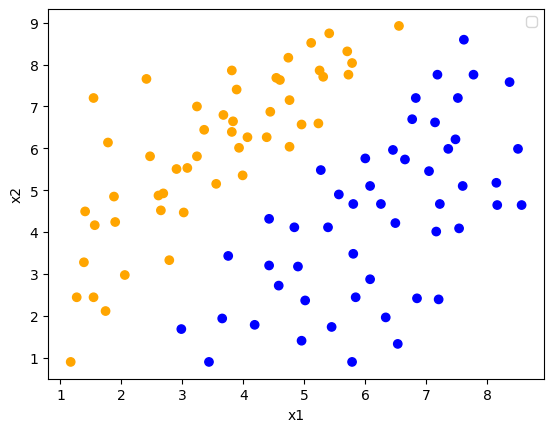

In [255]:
clr=df["Y"].map({1:"orange",-1:"blue"})
plt.scatter(df["x1"],df["x2"],c=clr)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [256]:
def train_test_split(X,Y,split):
    # split belongs [0,1]
    split_num=int(Y.shape[0]*split)
    Y_1=Y[:split_num,:]
    Y_2=Y[split_num:,:]
    X_1=X[:split_num,:]
    X_2=X[split_num:,:]
    return X_1,X_2,Y_1,Y_2

# seperating traing set for 70%
x_train,xtem,y_train,ytem=train_test_split(X,Y,split=0.7)
print(x_train.shape,y_train.shape)

# seperating cross validation(15%) and testing set(15%) split=0.5
x_val,x_test,y_val,y_test=train_test_split(xtem,ytem,split=0.5)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(70, 3) (70, 1)
(15, 3) (15, 1)
(15, 3) (15, 1)


In [257]:
theta=np.zeros((x_train.shape[1],1))
def H(x,theta):
    theta=theta.reshape(-1,1)
    return 1/(1+np.exp(-(x@theta)))
print(H(x_train,theta),H(x_train,theta).shape)

[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]] (70, 1)


In [258]:
def loss(X,Y,theta):
    m=X.shape[0]
    eps = 1e-15
    return -(1/m)*np.sum((Y)*np.log(H(X,theta)+eps)+(1-Y)*np.log(1-(H(X,theta)-eps)))
print(loss(x_train,y_train,theta))

0.6931471805599431


In [259]:
class logistic_regression():
    def __init__(self):
        self.weights=None
        self.training_loss=[]
        self.validation_loss=[]
        self.epochs=None
        self.lr=None
        self.confusion_matrix=None
        
    def fit(self,xt,yt,xv,yv,lr,epochs):
        self.weights=np.zeros((xt.shape[1],1))
        self.epochs=epochs
        self.lr=lr
        for i in range(self.epochs):
            m=xt.shape[0]
            self.weights-=(self.lr/(m))*(xt.T@(H(xt,self.weights)-yt))
            train_loss=loss(xt,yt,self.weights)
            val_loss=loss(xv,yv,self.weights)
            self.training_loss.append(train_loss)
            self.validation_loss.append(val_loss)
            print(f"Epoch {i+1}/{self.epochs} | Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f}")

    def training_history(self):

        return self.training_loss
    def validation_history(self):
        return self.training_loss
    
    def predict(self,x):
        return H(x,self.weights)
    
    def accuracy_score(self,x,y,threshold):
        total=x.shape[0]
        xpred=H(x,self.weights)
        xpred=(xpred>=threshold).astype(int).ravel()
        y=y.astype(int).ravel()
        correct=np.sum(y==xpred)
        return correct/total
    
    def confusion_matrixfn(self,x,y,threshold,show):
        xpred=H(x,self.weights)
        xpred=(xpred>=threshold).astype(int).ravel()
        y=y.astype(int).ravel()
        m=np.unique(y)
        confusion_matrix=[]
        for a in m:
            pred_row=[]
            for b in m:
                mask_1=(y==b)
                mask_2=(xpred==a)
                count=np.sum(mask_1 & mask_2)
                pred_row.append(int(count))
            confusion_matrix.append(pred_row)
        self.confusion_matrix=confusion_matrix
        if show:
            df=pd.DataFrame(confusion_matrix,index=[f"PRED {cls}" for cls in m],columns=[f"TRUE {cls}" for cls in m])
            print(df)

    def precision_for_binary_classification(self):
        if self.confusion_matrix[1][1]+self.confusion_matrix[1][0] == 0:
            return float(0)
        return self.confusion_matrix[1][1]/(self.confusion_matrix[1][1]+self.confusion_matrix[1][0])
    
    def recall_for_binary_classification(self):
        if self.confusion_matrix[1][1]+self.confusion_matrix[0][1] == 0:
            return float(0)
        return self.confusion_matrix[1][1]/(self.confusion_matrix[1][1]+self.confusion_matrix[0][1])
       
    def lossplot(self):
        epoch=np.arange(1,self.epochs+1)
        plt.plot(epoch,self.training_loss,label='training loss')
        plt.plot(epoch,self.validation_loss,label='validation loss')
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.legend()
        plt.show()

Epoch 1/50 | Train loss: 0.6368 | Val loss: 0.6597
Epoch 2/50 | Train loss: 0.5903 | Val loss: 0.5939
Epoch 3/50 | Train loss: 0.5510 | Val loss: 0.5557
Epoch 4/50 | Train loss: 0.5175 | Val loss: 0.5152
Epoch 5/50 | Train loss: 0.4886 | Val loss: 0.4836
Epoch 6/50 | Train loss: 0.4635 | Val loss: 0.4548
Epoch 7/50 | Train loss: 0.4415 | Val loss: 0.4300
Epoch 8/50 | Train loss: 0.4221 | Val loss: 0.4080
Epoch 9/50 | Train loss: 0.4048 | Val loss: 0.3885
Epoch 10/50 | Train loss: 0.3894 | Val loss: 0.3710
Epoch 11/50 | Train loss: 0.3754 | Val loss: 0.3553
Epoch 12/50 | Train loss: 0.3628 | Val loss: 0.3411
Epoch 13/50 | Train loss: 0.3513 | Val loss: 0.3281
Epoch 14/50 | Train loss: 0.3407 | Val loss: 0.3163
Epoch 15/50 | Train loss: 0.3311 | Val loss: 0.3055
Epoch 16/50 | Train loss: 0.3221 | Val loss: 0.2955
Epoch 17/50 | Train loss: 0.3138 | Val loss: 0.2863
Epoch 18/50 | Train loss: 0.3061 | Val loss: 0.2777
Epoch 19/50 | Train loss: 0.2989 | Val loss: 0.2698
Epoch 20/50 | Train l

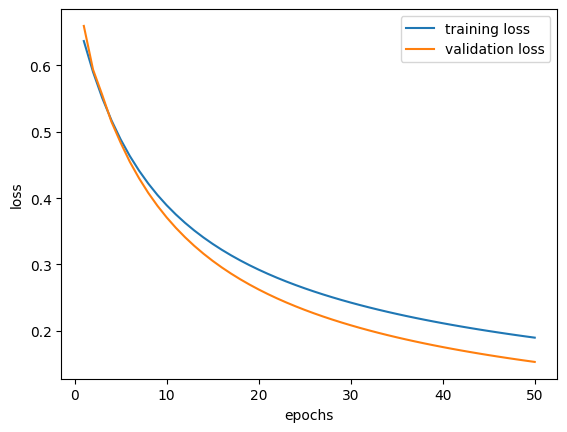

In [260]:
logistic_model=logistic_regression()
logistic_model.fit(x_train,y_train,x_val,y_val,0.1,50)
logistic_model.lossplot()

In [261]:
print(logistic_model.accuracy_score(x_train,y_train,0.5))
print(logistic_model.accuracy_score(x_val,y_val,0.5))
print(logistic_model.accuracy_score(x_test,y_test,0.5))

logistic_model.confusion_matrixfn(x_train,y_train,0.5,show=True)
logistic_model.confusion_matrixfn(x_val,y_val,0.5,show=True)
logistic_model.confusion_matrixfn(x_test,y_test,0.5,show=True)

0.9857142857142858
1.0
1.0
        TRUE 0  TRUE 1
PRED 0      31       1
PRED 1       0      38
        TRUE 0  TRUE 1
PRED 0       9       0
PRED 1       0       6
        TRUE 0  TRUE 1
PRED 0      10       0
PRED 1       0       5


In [262]:
def F1_score(X,Y,threshold):
    logistic_model.confusion_matrixfn(X,Y,threshold,show=False)
    precision=logistic_model.precision_for_binary_classification()
    print("precision : ", precision)
    recall=logistic_model.recall_for_binary_classification()
    print("recall",recall)
    return (2*precision*recall)/(precision+recall)

print("F1 SCORE: ",F1_score(x_train,y_train,0.5))
print("F1 SCORE: ",F1_score(x_val,y_val,0.5))
print("F1 SCORE: ",F1_score(x_test,y_test,0.5))

precision :  1.0
recall 0.9743589743589743
F1 SCORE:  0.9870129870129869
precision :  1.0
recall 1.0
F1 SCORE:  1.0
precision :  1.0
recall 1.0
F1 SCORE:  1.0


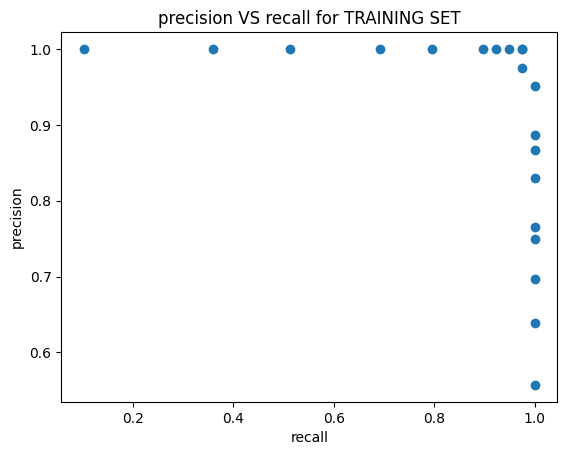

In [263]:
precision_plot=[]
recall_plot=[]
thresholds=np.arange(0,1,0.05)
# training plot
for i in thresholds:
    logistic_model.confusion_matrixfn(x_train,y_train,i,show=False)
    precision=logistic_model.precision_for_binary_classification()
    recall=logistic_model.recall_for_binary_classification()
    precision_plot.append(precision)
    recall_plot.append(recall)
plt.scatter(recall_plot,precision_plot)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision VS recall for TRAINING SET")
plt.show()

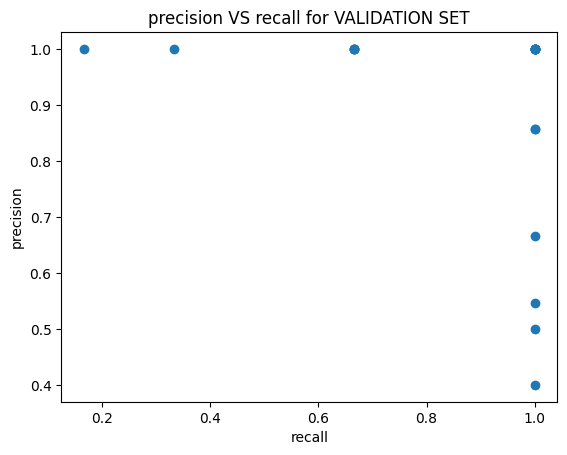

In [264]:
precision_plot=[]
recall_plot=[]
# validation plot
for i in thresholds:
    logistic_model.confusion_matrixfn(x_val,y_val,i,show=False)
    precision=logistic_model.precision_for_binary_classification()
    recall=logistic_model.recall_for_binary_classification()
    precision_plot.append(precision)
    recall_plot.append(recall)
plt.scatter(recall_plot,precision_plot)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision VS recall for VALIDATION SET")
plt.show()

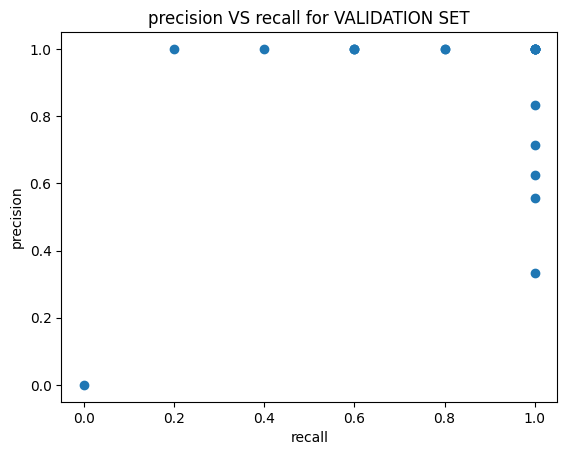

In [268]:
precision_plot=[]
recall_plot=[]
# testing plot
for i in thresholds:
    logistic_model.confusion_matrixfn(x_test,y_test,i,show=False)
    precision=logistic_model.precision_for_binary_classification()
    recall=logistic_model.recall_for_binary_classification()
    precision_plot.append(precision)
    recall_plot.append(recall)
plt.scatter(recall_plot,precision_plot)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision VS recall for VALIDATION SET")
plt.show()

In [269]:
weights=logistic_model.weights
print(weights)

[[-1.0600702 ]
 [ 0.91685552]
 [ 0.12564644]]


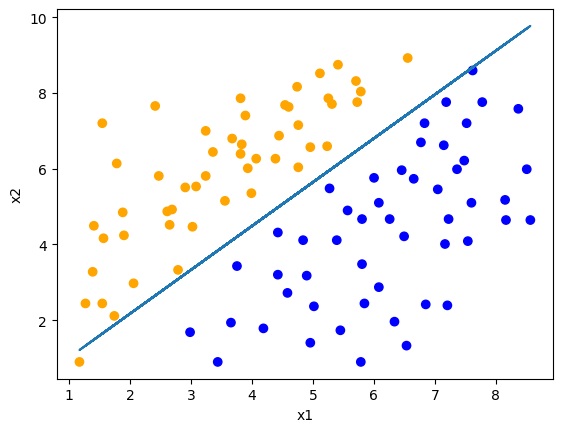

In [270]:
clr=df["Y"].map({1:"orange",-1:"blue"})
plt.scatter(df["x1"],df["x2"],c=clr)
plt.plot(df["x1"],-(weights[2]+df["x1"]*weights[0])/weights[1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()